# Day 9: Polynomial and Ridge Regression

Today, we will explore Polynomial Regression and Ridge Regression. These are two important extensions of the basic linear regression model that allow us to handle more complex data relationships and regularization in machine learning models.

## Topics Covered
- Polynomial Regreassion
- Model Evaluation Using Mean Squared Error (MSE)
- Ridge Regression (L2 Regularization)
- Overfitting and Regularization

## 1. Polynomial Regression

While linear regression models a straight-line relationship betwwen features and the target variable, polynomial regression models non-linear relationships. It does this by transforming the original features into polnomial features of a specified degree, which allows the model to fit curved patterns in the data.

### Key Points:
- Polynomial Features: 
    - The model adds polynomial terms like $ 𝑥^2,𝑥^3, \dots $ to the dataset to capture non-linear relationships.

- Still a Linear Model: 
    - Despite the polynomial terms, the regression is still considered "linear" because the model is linear in terms of the coefficients (weights).
- Degree of Polynomial: 
    - The degree of the polynomial determines the flexibility of the curve. A higher degree can capture more complex patterns, but it also increases the risk of overfitting.

### Formula for Polynomial Regression:

$ y= \beta_0 + \beta_1 x+ \beta_2  x^2+\dots+ \beta_n x^n$

Where:
- $ y: is Target variable 
- $ \beta_0 $ is intercept term, which is the value of $y$ when $x=0$
- $ \beta_1, \beta_2, \dots, \beta_n $: These are co-efficients and parameters of the polynomial regression model. They represent the weights that the model assigns to each corresponding power of the independent variable $x$. Each coefficient captures the influence of a different power of $ x$ on the dependent variable $y$.

###  Example: House price prediction model

In a house price prediction model, the relationship between house size and price might not be perfectly linear. Larger houses could increase in price at a non-linear rate (e.g., a large house might be disproportionately more expensive than a slightly smaller one). Polynomial regression allows the model to capture such a pattern.

When we are predicting house prices, and the relationship between square footage (feature $x$) and price ($y$) is not linear, a polynomial regression model might fit better than a simple linear regression model. A quadratic term ($\beta_2 x^2$ ) could capture situations where price increases at an increasing rate as square footage grows.

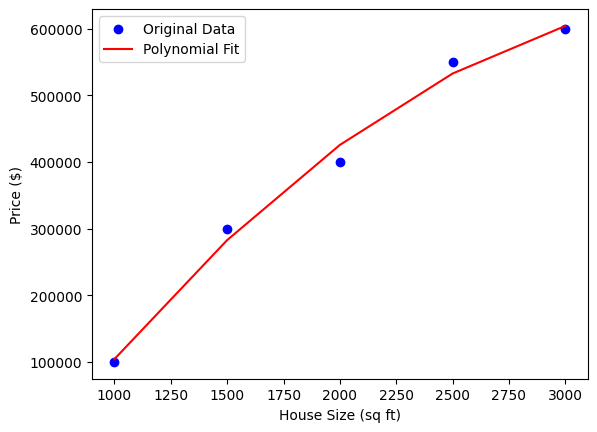

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sample data (house sizes and prices)
X = np.array([1000, 1500, 2000, 2500, 3000]).reshape(-1, 1)

y = np.array([100000, 300000, 400000, 550000, 600000])

# Transforming data to include polynomial features
poly = PolynomialFeatures(degree=2)  # degree 2 polynomial

X_poly = poly.fit_transform(X)

# Fitting the linear regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predicting prices
y_pred = model.predict(X_poly)

# Plotting the original data and the polynomial fit
plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X, y_pred, color='red', label='Polynomial Fit')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


### Pros:
- Can model non-linear relationships.
- Provides flexibility in fitting data that a simple linear model might miss.

### Cons:
- Susceptible to overfitting if the degree of the polynomial is too high.
- More complex and harder to interpret than simple linear regression.

## 2. Model Evaluation Using Mean Squared Error (MSE)

Before jumping into Ridge Regression, it’s crucial to understand how we evaluate the performance of a regression model. One commonly used metric is the Mean Squared Error (MSE).

### What is Mean Squared Error (MSE)?

MSE is the average of the squares of the differences between the predicted and actual values. It measures how well the model's predictions match the actual target values.


$ MSE = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 $


Where:
- $y_i$ = actual value
- $ \hat{y}_i $ = predicted value

In [10]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# House sizes (square feet) and corresponding prices
X = np.array([1000, 1500, 2000, 2500, 3000]).reshape(-1, 1)
y = np.array([200000, 300000, 400000, 550000, 700000])

# Polynomial regression transformation (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Linear Regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predicted values
y_pred = model.predict(X_poly)

# Calculate Mean Squared Error
mse = mean_squared_error(y, y_pred)

print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 28571428.57



The Mean Squared Error (MSE) value of 28,571,428.57 indicates how far the predicted house prices are from the actual prices on average, considering the squared differences.

A higher MSE means that, on average, the model's predictions are far from the actual values, while a lower MSE indicates that the predictions are closer to the actual values.

## 3. Ridge Regression (L2 Regularization)

Ridge regression is a type of regularized linear regression. In standard linear regression, the model tries to minimize the sum of squared errors between the predicted and actual values. Ridge regression modifies this by adding a penalty for large coefficients (weights), which helps prevent overfitting when working with many features or when features are highly correlated.

### Formula for Ridge Regression:

$ Minimize  \left( \text{RSS} + \lambda \sum_{i=1}^{n} \beta_i^2 \right) $


Where:
- $RSS$ is the residual sum of squares (standard error term).
- $\lambda$ is the regularization parameter that controls the strength of the penalty. A higher $\lambda$ leads to more regularization (smaller coefficients).

In [43]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Sample data (house sizes and prices)
X = np.array([1000, 1500, 2000, 2500, 3000]).reshape(-1, 1)
y = np.array([200000, 300000, 400000, 500000, 600000])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.003265303132143936


### Benefits of Ridge Regression:


- Prevents Overfitting: 
    - The regularization term penalizes large coefficients, preventing the model from fitting noise in the training data.
- Works Well with Collinear Data: 
    - Helps when features are correlated with each other (multicollinearity).

### Use Case:


Ridge regression is particularly useful in scenarios where you have many features, and some of them are highly correlated. For example, in a marketing campaign effectiveness model, where spending on different marketing channels (TV, online ads, print media) might be correlated, Ridge regression can prevent overfitting.

### Pros:


- Reduces overfitting in models with many features.
- Helps manage multicollinearity (correlation between features).


### Cons:

- Not ideal for selecting the most important features (Lasso regression is better for this).
- Requires tuning of the regularization parameter ($\lambda$).

## 4. Overfitting and Regularization

Overfitting occurs when a model fits the training data too well, including its noise and outliers. While the model performs great on the training data, it performs poorly on unseen test data.

### Detecting Overfitting:

- Train MSE is significantly lower than Test MSE.
- The model’s performance on the test data is much worse than on the training dat

### Regularization to Prevent Overfitting:

Ridge Regression helps prevent overfitting by discouraging overly complex models through regularization.

Linear Regression Train MSE: 0.00
Linear Regression Test MSE: 0.00
Ridge Regression Train MSE: 0.11
Ridge Regression Test MSE: 0.91


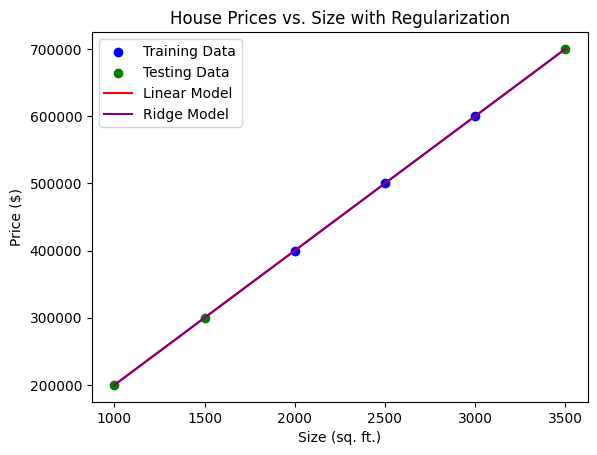

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample data (house sizes and prices)
X = np.array([1000, 1500, 2000, 2500, 3000, 3500]).reshape(-1, 1)
y = np.array([200000, 300000, 400000, 500000, 600000,700000])


# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 1. Train a simple Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# Calculate MSE for linear regression model
train_mse_linear = mean_squared_error(y_train, y_train_pred)
test_mse_linear = mean_squared_error(y_test, y_test_pred)

print(f"Linear Regression Train MSE: {train_mse_linear:.2f}")
print(f"Linear Regression Test MSE: {test_mse_linear:.2f}")

# 2. Train a Ridge Regression model to regularize and prevent overfitting
ridge_model = Ridge(alpha=2.0)  # Regularization strength
ridge_model.fit(X_train, y_train)

# Predict on training and testing data using Ridge Regression
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# Calculate MSE for Ridge Regression model
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)

print(f"Ridge Regression Train MSE: {train_mse_ridge:.2f}")
print(f"Ridge Regression Test MSE: {test_mse_ridge:.2f}")

# Plotting the results
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X, linear_model.predict(X), color='red', label='Linear Model')
plt.plot(X, ridge_model.predict(X), color='purple', label='Ridge Model')
plt.title('House Prices vs. Size with Regularization')
plt.xlabel('Size (sq. ft.)')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


## Conclusion:

On Day 9, we have learned:

- How Polynomial Regression can be used to model non-linear relationships.
- We learned how to evaluate models using Mean Squared Error (MSE).
- How Ridge Regression applies regularization to linear models, preventing overfitting, and dealing with multicollinearity.

## What's Next:

Tomorrow, we'll dive deeper into Lasso Regression and ElasticNet Regression, two advanced techniques that enhance linear models by adding regularization. These techniques are particularly powerful when dealing with datasets that contain a large number of features, many of which may be irrelevant or highly correlated.

### Practical Insights:

- Feature Selection: 
    - How Lasso simplifies models by discarding irrelevant variables.
- Dealing with Multicollinearity: 
    - How ElasticNet helps overcome issues in datasets with correlated predictors.
- Regularization Tuning: 
    - Learn how to adjust regularization strength to avoid overfitting and achieve better generalization on unseen data.

By the end of tomorrow’s session, we will be equipped with powerful tools to manage complex datasets, improve model performance, and understand the trade-offs between feature selection and regularization. These concepts will lay a strong foundation for tackling more sophisticated machine learning challenges.